## Filippo Conforto
## ID: 2021856

### Libraries and imports

In [2]:
import numpy as np
import time
import requests as req
import json
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.axis as mplax

## Fun Exercise

The `XOR` operation between the given numbers returns the correct results. The proof for each given couple follows:

* 1 $\oplus$ 2 = 01 $\oplus$ 10 = 11 = 3
* 2 $\oplus$ 5 = 010 $\oplus$ 101 = 111 = 7
* 3 $\oplus$ 7 = 011 $\oplus$ 111 = 100 = 4
* 4 $\oplus$ 5 = 100 $\oplus$ 101 = 001 = 1
* 5 $\oplus$ 9 = 0101 $\oplus$ 1001 = 1100 = 12

## 1-Redundancy

The aim of this exercise is to reproduce a RAID-4 software algorithm, by converting a single input("document.pdf") into four data files "raid4.0","raid4.1","raid4.2","raid4.3", and one parity file. 

### 1.1

Starting with the original file and reading bunches of 4 bytes each time is possible to divide the group between the final files. The parity is then calculated over each bunch of bytes as D0 $\oplus$ D1 $\oplus$ D2 $\oplus$ D3,and then printed in the last file.

In [1]:
filenames = ["raid4.0","raid4.1","raid4.2","raid4.3","raid4.4"]
doc = open("document.pdf", "rb")
flist = []
llist = []
for name in filenames:
    flist.append(open(name, "wb"))
    llist.append([])
parities = [0]*5

In [3]:
byt = doc.read(4)
while len(byt)==4:
    for i in range(4):
        flist[i].write(bytes([byt[i]]))
        llist[i].append(byt[i])
    flist[4].write(bytes([byt[0]^byt[1]^byt[2]^byt[3]]))
    llist[4].append(byt[0]^byt[1]^byt[2]^byt[3])
    byt = doc.read(4)
    if len(byt)==0:
        break
    elif len(byt)<4:                #Filling missing bytes using 
        byt = list(byt)             #a number of bytes defined as zero
        byt.extend([0]*(4-len(byt)))
    

 If there are less than 4 bytes, an adequate number of bytes zero is added in order to apply correctly the `XOR` operation.

The output files are visible in the folder.

### 1.2

#### **Answer:**
The column-wise parity acts as a checksum for each strip file.

In [4]:
for i,l in enumerate(llist):
    parities[i] = (reduce(lambda x, y: x ^ y, l))

for fs in flist:
    fs.close()
doc.close()    

In [10]:
print("The parities values are ",list(map(chr,parities)))

The parities values are  ['¥', '\x07', '\xa0', '\x9c', '\x9e']


 The size overhead is calculated as: 
 
 $$ \frac{\rm{Total \ size \ of \ the \ final \ files} - \rm{Size \ of \ the \ original \ file}}{ \rm{Size \ of \ the \ original  \ file}} $$
 
With the size of the original file of 170619 bytes.

#### **Answer:**

In [8]:
print(f"The size overhead is {(sum(list(map(len,llist)))-170619)/(170619)*100:.2f}%")

The size overhead is 25.00%


### 1.3

In [11]:
print(f"The 5 bytes parity value is {hex(parities[0])}0{hex(parities[1])[2:4]}{hex(parities[2])[2:4]}{hex(parities[3])[2:4]}{hex(parities[4])[2:4]}")

The 5 bytes parity value is 0xa507a09c9e


### 1.4

The row-wise parities of the five stripe files would be zero since the operation consists in a `XOR` between two identical quantities. In this way the resulting file will be filled with bytes zero.

D0 $\oplus$ D1$\oplus$D2$\oplus$D3 $\oplus$ P=(D0 $\oplus$ D1$\oplus$D2$\oplus$D3)$\oplus$(D0$\oplus$D1$\oplus$D2$\oplus$D3) = (D0$\oplus$D0) $\oplus$ (D1$\oplus$D1) $\oplus$ (D2$\oplus$D2) $\oplus$ (D3$\oplus$D3) = 0

Result that is due to the properties of the `XOR` operation given P as the byte of the parity file.

### 1.5

Since the new parity is 0xa507a0<span style="color:red">01</span>9e, then the error is located in the fourth disk. In order to reconstruct the original content, the files to be used are the first three and the parity one. By applying the parity between each group of bytes coming from these files the result will be the content of the failed disk.

The restruction operation per byte is D3 =  D0 $\oplus$ D1$\oplus$D2$\oplus$P 

## 2

### 2.1

The encryption technique is clearly a symmetric one since the key is the same used to encrypt and decrypt the message.

### 2.2

The original message is "K]amua!trgpy". The decryption will follow the inverse process with respect to the encryption one, starting from the nonce removal and following with the key removal. In this way the operations are reverted and is possbile to find the correct sentence.

In [63]:
alist = np.asarray(list(map(ord,"K]amua!trgpy")))

The original string is transformed into an array of ASCII values.

In [64]:
alist = alist - np.arange(5,5+alist.shape[0]) ## Removing the nonce
clist = alist.copy().reshape(1,-1)

The nonce is removed using numpy functions.

In [65]:
for i in range(1,256):
    if np.all((alist - i)>0):
        clist = np.concatenate([clist,(alist - i).reshape(1,-1)]) ## Decryption attempts
    else:
        nlist = (alist - i)
        nlist[nlist <0]+=255
        clist = np.concatenate([clist,nlist.reshape(1,-1)])

In the same way all the numbers between 1 and 255 are subtracted to the original message in order to find the correct results.

Since with large numbers the resulting array contains negative numbers, in this case they are increased by 255, emulating a periodic set of numbers. This is the only way to get a significative result.

In [67]:
wordlist = [[''.join([chr(x) for x in word]),i+1] for i,word in enumerate(clist)]

#### **Answer:**

In [70]:
print(f"The used key is {wordlist[245][1]}, the original message text is \"{wordlist[245][0]}\"")

The used key is 246, the original message text is "Padova rocks"


## 3 

### 3.1

The occupation process can be simulated using random functions given by numpy.

In [11]:
occ10 = np.zeros(10)

while  (not np.any(occ10 >= 1.)):
    occ10[np.random.randint(0,10)]+=0.01

Since each file occupies 10 GB, or 0.01 TB, for each hard disk, if chosen, the stored memory increases by 0.01.

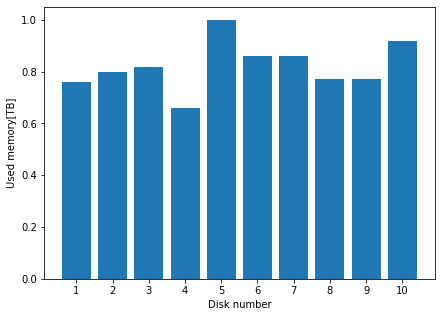

In [28]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.bar(np.arange(1,11),occ10)
ax.set_xlabel("Disk number")
ax.set_ylabel("Used memory[TB]")
ax.set_xticks(list(range(1,11)))
plt.show()


#### 3.1a
##### **Answer:**

In [13]:
print(f"The number of placed files is {sum(occ10)/0.01:.0f}")

The number of placed files is 822


#### 3.1b
##### **Answer:**

In [14]:
print(f"The used space percentage is  {sum(occ10)*100/10:.1f} %")

The used space percentage is  82.2 %


### 3.2

In [16]:
occ1 = np.zeros(10)

while  (not np.any(occ1 >= 1.)):
    occ1[np.random.randint(0,10)]+=0.001

Since each file occupies 1 GB, or 0.001 TB, for each hard disk, if chosen, the stored memory increases by 0.001.

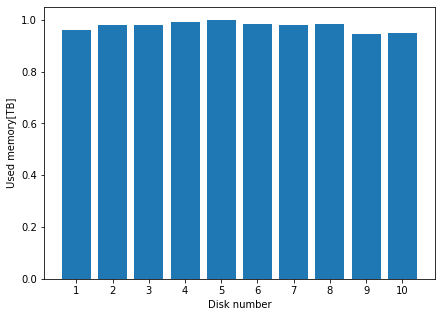

In [27]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.bar(np.arange(1,11),occ1)
ax.set_xlabel("Disk number")
ax.set_ylabel("Used memory[TB]")
ax.set_xticks(list(range(1,11)))
plt.show()


#### 3.2a
##### **Answer:**

In [20]:
print(f"The number of placed files is {sum(occ1)/0.001:.0f}")

The number of placed files is 9755


#### 3.2b
##### **Answer:**

In [21]:
print(f"The used space percentage is  {sum(occ1)*100/10:.2f} %")

The used space percentage is  97.55 %


### 3.3

From these two examples is clear that by reducing the chunk size a better space occupation is possible. Files are usually stored in 4M chunks, since it allows a better redistribution of files over all the memories.

In [22]:
occ4 = np.zeros(10)
while  (not np.any(occ4 >= 1.)):
    occ4[np.random.randint(0,10)]+=4e-6

Since each file occupies 4 MB, or $4\cdot 10^{-6}$ TB, for each hard disk, if chosen, the stored memory increases by $4\cdot 10^{-6}$.

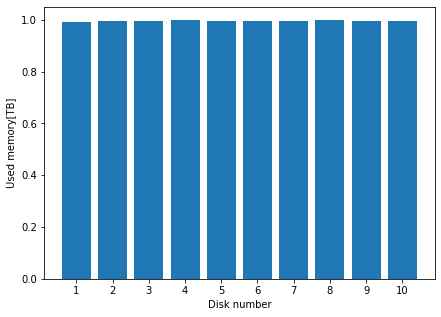

In [26]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.bar(np.arange(1,11),occ4)
ax.set_xlabel("Disk number")
ax.set_ylabel("Used memory[TB]")
ax.set_xticks(list(range(1,11)))
plt.show()


In [24]:
print(f"The number of placed files is {sum(occ4)/4e-6:.0f}")

The number of placed files is 2490571


In [25]:
print(f"The occupation percentage is  {sum(occ4)*100/10:.2f} %")

The occupation percentage is  99.62 %


The benefit is clear, since almost all the available space is used.

### 3.4

In [38]:
print(f"The average used space for the first case is {np.mean(occ10):.3f} TB with a standard deviation of {np.std(occ10):.3f} TB")

The average used space for the first case is 0.864 TB with a standard deviation of 0.088 TB


In [39]:
print(f"The average used space for the second case is {np.mean(occ1):.3f} TB with a standard deviation of {np.std(occ1):.3f} TB")

The average used space for the second case is 0.954 TB with a standard deviation of 0.031 TB


In [40]:
print(f"The average used space for the third case is {np.mean(occ4):.3f} TB with a standard deviation of {np.std(occ4):.3f} TB")

The average used space for the third case is 0.998 TB with a standard deviation of 0.001 TB


The standard deviation decreases as the block size decreases, meaning that the used memory distribution will concentrate in a very small portion of the event space and that the available memory will be used optimally for all hard disks.

Since the used space is obtained as a sum of random variables (with the probability to add a file for a hard disk inversely proportional to the number of hard disk), the sum of the memory used by single files, for the central limit theorem, must behave as a Gaussian distribution with mean and variance similar to the ones found before.

This proposition can be verified simulating the process for an higher number of disks and plotting the distribution of the used space.

In [29]:
occt1 = np.zeros(2000)
while  (not np.any(occt1 >= 1.)):
    occt1[np.random.randint(0,2000)]+=0.01
occt2 = np.zeros(2000)
while  (not np.any(occt2 >= 1.)):
    occt2[np.random.randint(0,2000)]+=0.001
## The simulation with a larger number of disks for the case
## with 4 MB blocks takes a lot of much time
#occt3 = np.zeros(500)
#while  (not np.any(occt3 >= 1.)):
#    occt3[np.random.randint(0,500)]+=4e-6

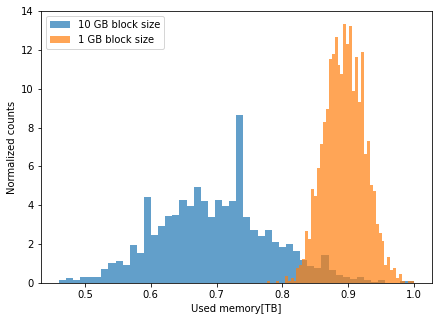

In [30]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.hist(occt1, alpha = 0.7, bins = 50, density = True, label="10 GB block size")
ax.hist(occt2,alpha = 0.7, bins = 50, density = True, label="1 GB block size")
#plt.hist(occt3,alpha = 0.7, bins =25)
ax.set_xlabel("Used memory[TB]")
ax.set_ylabel("Normalized counts")

plt.legend()
plt.show()

The two gaussians behaves has expected.

## 4

### 4.1.1

All the operation are done on the server using the package `requests`. The package allows to send GET and POST and so to do all the operations required.

In [2]:
URL = "https://pansophy.app:8443"

`get` allows to download all the content of the server, while `post` is used to append new transactions.

In [ ]:
r = req.get(url = URL, verify=False)

A json is used to append requests to the server.

In [40]:
data = {"operation": "merit",
        "team": "Giovanni",
        "coin": 1000,
        "stealfrom": "genesis"}

In [ ]:
resp1 = req.post(url = URL, json = data, verify=False)

Another json is needed in order to claim the amount required. This one must be "posted" after 10s to pass the proof of time.

In [42]:
claim = {
    "operation": "claim",
    "team": "Giovanni"
}

In [ ]:
resp2 = req.post(url = URL, json = claim, verify=False)

### 4.1.2

The maximum number of transactions that can be done in a day, given that only one transaction can be done at once and that the proof of time is 10s is simply calculated as

$$\frac{24 \cdot 60 \cdot 60 s}{10 s}= 8640$$

### 4.2/4.2.1

In [56]:
def calculate_hash(self):  
    block_of_string = "{}{}{}{}{}".format( self.index,
                                              self.team, 
                                              self.prev_hash,
                                              self.coins, 
                                              self.timestamp)  
    self.my_hash = hashlib.sha256(block_of_string.encode()).hexdigest()
    return self.my_hash

This function works as an hashing function that depends on the structure and the timestamp of a transaction, and also on the previous transaction hash.

The used hashing algorithm is SHA256 that generates a 32 bytes hash for each given set of values encoded in the variable `block_of_string`.

Using this kind of hashing algorithm allows to identify univocally each block inside the blockchain and make the new hash depend on the hash of the previous block. The security implications will be treated below.

### 4.2.2

The validation of the blockchain's content is done by checking that all the hashes actually corresponds to the blocks' contents. This must be done by hashing all the blocks of the blockchain, since each one depends on the previous one. A small change of a block has so a consequence easily detectable, given that the SHA256 algorithm produces a difference hash if the starting string is different.

A variation on the blockchain can be found easily since a change of one of the old blocks implies changes in all the next hashes, given that each hash depends on the previous one. The existence of proof of time also allows to keep the system more secure, since a full subsitution of blocks would result in a large execution time before all the elements of the blockchain are substituted with the correct ones, in order to have consistecy between the blocks' hash.


### 4.2.3

POST is used to append requests to the blockchain and so the execution time dependence is only of O(1), since it does not have to go trough all the blocks of the chain in order to "post" a new one.

GET instead works by downloading all the chain content and so his execution time dipendence must be of O(N), with N as the current number of transactions. 

The GET dependence on N can be one of the major problems in scalability if the chain has a large size.

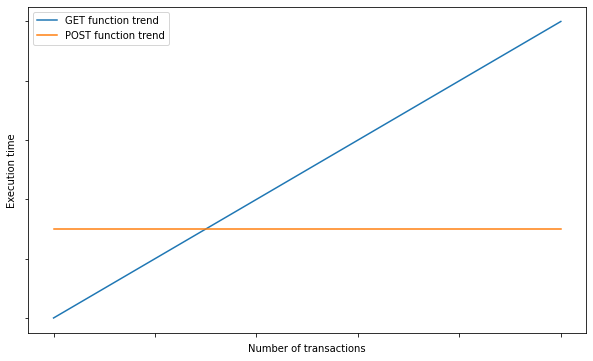

In [30]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
plt.plot(np.linspace(0,100,1000),np.linspace(0,100,1000), label = "GET function trend")
plt.plot(np.linspace(0,100,1000),[30]*1000, label = "POST function trend")
ax.set_ylabel("Execution time")
ax.set_xlabel("Number of transactions")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.legend()
plt.show()

### 4.2.4

The account balances can be restored simply by starting from the inital state and redistributing the money according to the sequence of transactions.

### 4.2.5

The main advantage of REST APIs is the simplicity, the structure based on GET and POST functions that allows a complete communication with the server. Also the use of some communication standards, such as `JSON`, allows to make the exchange of information even simpler. In particular `JSON` structure is helpful if the information set to send has an hierarchical shape, since it allows to store it in a plain structure.

The main disadvantage of REST APIs is the stateless configuration, so if the server crashes all the informations about the state are lost as was discussed in exercise 4.2.4, and the last state must be rebuilt from the starting one. 